# Define função

In [3]:
import time

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, linestyle='-')

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral - PAINEL
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral_painel(aneis, lon_r, lat_r, color, label, x):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                aneis (lista): tamanho do raio do círculo em km
                lon_r (float): valor da longitude do centro do círculo em graus
                lat_r (float): valor da latitude do centro do círculo em graus
                color (str): cor do raio do círculo
                label (str): legenda

    Parâmetros de saída:
                latitude e longitude que delimita círculos de distância centrado no radar e plota os círculos
    """

    import geopy
    from geopy import distance

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax[x].plot(lons[i,:], lats[i,:], color=color, label= label, linestyle='-')

# Leitura do dado

In [2]:
%%time
#==========================================================================#
#                         IMPORTAÇÃO DE BIBLIOTECAS
#==========================================================================#
import xarray as xr
import proplot as pplt
import cartopy.crs as ccrs
import time
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#==========================================================================#
#                         LEITURA DOS DADOS
#==========================================================================#
# limites da figura
latmin, latmax, lonmin, lonmax = 36, 43, -115, -108
latmin, latmax, lonmin, lonmax = 36, 40, -115, -110
latmin, latmax, lonmin, lonmax = 35.5, 40, -115.5, -110

# leitura do dado
ds = xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land').sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))
ds

CPU times: total: 2.88 s
Wall time: 13 s


<xarray.Dataset>
Dimensions:  (lat: 540, lon: 660)
Coordinates:
  * lat      (lat) float64 35.5 35.51 35.52 35.53 ... 39.97 39.98 39.99 40.0
  * lon      (lon) float64 -115.5 -115.5 -115.5 -115.5 ... -110.0 -110.0 -110.0
Data variables:
    elev     (lat, lon) float32 ...
Attributes: (12/67)
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              srtm30plus_v11_land
    naming_authority:                org.pacioos
    metadata_link:                   http://pacioos.org/metadata/srtm30plus_v...
    ISO_Topic_Categories:            elevation
    title:                           SRTM30+ Global 1-km Digital Elevation Mo...
    ...                              ...
    publisher_type:                  institution
    license:                         David T. Sandwell, Walter H. F. Smith, a...
    acknowledgement:                 The Pacific Islands Ocean Observing Syst...
    cdm_data_type:                   Grid
    source:                          USGS SRTM30 DEM, USGS GTOPO30 DEM
    references:                      http://pacioos.org/metadata/world_srtm30...

# Calcula distância entre os radares e a câmera

In [198]:
%%time
from geopy.distance import geodesic

# distância da câmera aos radares
lon_radar_salte_lake_norte, lat_radar_salte_lake_norte = -112.447778, 41.262778
lon_radar_cedar_sul, lat_radar_cedar_sul = -112.862183, 37.59105
lat_cam, lon_cam = 39.33844, -112.70092

dis_salte_lake_norte = geodesic( (lat_cam, lon_cam), (lat_radar_salte_lake_norte, lon_radar_salte_lake_norte)  ).kilometers
dis_salte_cedar_sul = geodesic( (lat_cam, lon_cam), (lat_radar_cedar_sul, lon_radar_cedar_sul)  ).kilometers

print('dis_salte_lake_norte=', dis_salte_lake_norte)
print('dis_salte_cedar_sul=', dis_salte_cedar_sul)

dis_salte_lake_norte= 214.7600954324628
dis_salte_cedar_sul= 194.47939154536783
CPU times: total: 0 ns
Wall time: 0 ns


# Plota figura: **MAPA SOZINHO**

CPU times: total: 24 s
Wall time: 45.2 s


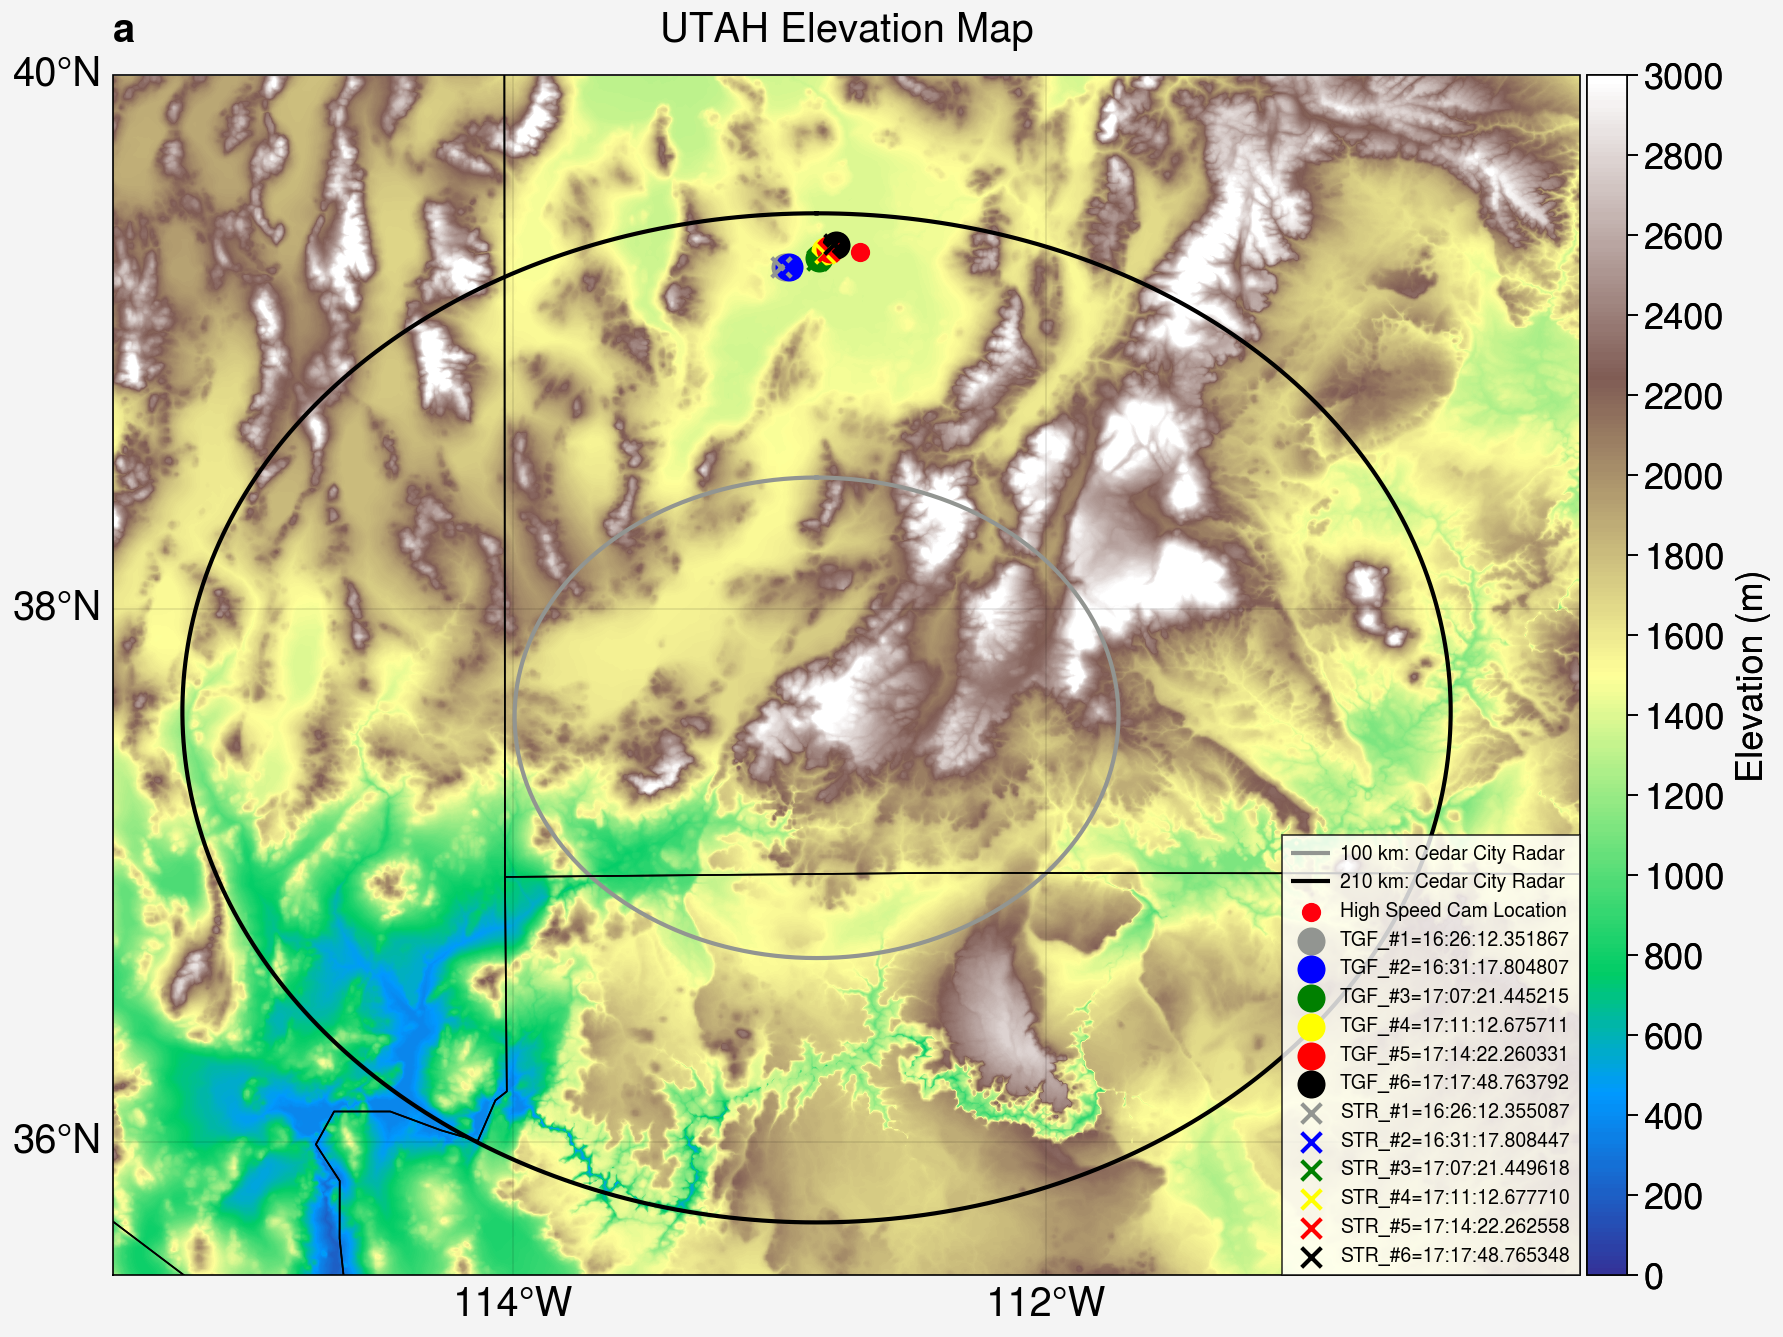

In [199]:
%%time
#========================================================================================================================#
#                                               MAPA DE RELEVO
#========================================================================================================================#
# moldura da figura
fig, ax = pplt.subplots(axheight=6, tight=True, proj='pcarree')

# mapa de contornos preenchidos
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'],
                   cmap='terrain',
                   levels=pplt.arange(0, 3000, 10))

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=True,
          labels=True, latlines=2, lonlines=2,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='UTAH Elevation Map',
          small='20px', large='20px')

#========================================================================================================================#
#                                              PLOTA CÂMERA
#========================================================================================================================#
lat_cam, lon_cam = 39.33844, -112.70092
ax.scatter(lon_cam, lat_cam, transform=ccrs.PlateCarree(), marker='o', s=40, color='bright red', label=f'High Speed Cam Location')

#========================================================================================================================#
#                                              PLOTA TFG
#========================================================================================================================#
lat_tgf_20210911_1625, lon_tgf_20210911_1625 = [39.281201], [-112.98016]
lat_tgf_20210911_1629, lon_tgf_20210911_1629 = [39.282172], [-112.964349]
lat_tgf_20210911_1706, lon_tgf_20210911_1706 = [39.315896], [-112.854204]
lat_tgf_20210911_1710, lon_tgf_20210911_1710 = [39.340801], [-112.832229]
lat_tgf_20210911_1714, lon_tgf_20210911_1714 = [39.348241], [-112.812355]
lat_tgf_20210911_1719, lon_tgf_20210911_1719 = [39.365816], [-112.790574]

label_tgf_1 = '16:26:12.351867'
label_tgf_2 = '16:31:17.804807'
label_tgf_3 = '17:07:21.445215'
label_tgf_4 = '17:11:12.675711'
label_tgf_5 = '17:14:22.260331'
label_tgf_6 = '17:17:48.763792'

cores = ['gray', 'blue', 'green', 'yellow', 'red', 'black']

ax.scatter(lon_tgf_20210911_1625, lat_tgf_20210911_1625, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[0], label=f'TGF_#1={label_tgf_1}')

ax.scatter(lon_tgf_20210911_1629, lat_tgf_20210911_1629, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[1], label=f'TGF_#2={label_tgf_2}')

ax.scatter(lon_tgf_20210911_1706, lat_tgf_20210911_1706, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[2], label=f'TGF_#3={label_tgf_3}')

ax.scatter(lon_tgf_20210911_1710, lat_tgf_20210911_1710, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[3], label=f'TGF_#4={label_tgf_4}')

ax.scatter(lon_tgf_20210911_1714, lat_tgf_20210911_1714, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[4], label=f'TGF_#5={label_tgf_5}')

ax.scatter(lon_tgf_20210911_1719, lat_tgf_20210911_1719, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[5], label=f'TGF_#6={label_tgf_6}')
        
#========================================================================================================================#
#                                               PLOTA STROKES
#========================================================================================================================#
lat_str_20210911_1625, lon_str_20210911_1625 = [39.2798], [-112.9941]
lat_str_20210911_1629, lon_str_20210911_1629 = [39.2820], [-112.9663]
lat_str_20210911_1706, lon_str_20210911_1706 = [39.3086], [-112.8601]
lat_str_20210911_1710, lon_str_20210911_1710 = [39.3328], [-112.8308]
lat_str_20210911_1714, lon_str_20210911_1714 = [39.3426], [-112.8184]
lat_str_20210911_1719, lon_str_20210911_1719 = [39.3673], [-112.7977]

label_str_1 = '16:26:12.355087'
label_str_2 = '16:31:17.808447'
label_str_3 = '17:07:21.449618'
label_str_4 = '17:11:12.677710'
label_str_5 = '17:14:22.262558'
label_str_6 = '17:17:48.765348'

ax.scatter(lon_str_20210911_1625, lat_str_20210911_1625, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[0], label=f'STR_#1={label_str_1}')

ax.scatter(lon_str_20210911_1629, lat_str_20210911_1629, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[1], label=f'STR_#2={label_str_2}')

ax.scatter(lon_str_20210911_1706, lat_str_20210911_1706, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[2], label=f'STR_#3={label_str_3}')

ax.scatter(lon_str_20210911_1710, lat_str_20210911_1710, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[3], label=f'STR_#4={label_str_4}')

ax.scatter(lon_str_20210911_1714, lat_str_20210911_1714, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[4], label=f'STR_#5={label_str_5}')

ax.scatter(lon_str_20210911_1719, lat_str_20210911_1719, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[5], label=f'STR_#6={label_str_6}')

#========================================================================================================================#
#                                               PLOTA ANEIS DO RADAR
#========================================================================================================================#
#lon_radar_salte_lake_norte, lat_radar_salte_lake_norte = -112.447778, 41.262778
lon_radar_cedar_sul, lat_radar_cedar_sul = -112.862183, 37.59105
#evm_plota_aneis_em_geral([240], lon_radar_salte_lake_norte, lat_radar_salte_lake_norte, 'yellow', label='240 km: Salte Lake City Radar')
evm_plota_aneis_em_geral([100], lon_radar_cedar_sul, lat_radar_cedar_sul, 'gray', label='100 km: Cedar City Radar')
evm_plota_aneis_em_geral([210], lon_radar_cedar_sul, lat_radar_cedar_sul, 'black', label='210 km: Cedar City Radar')

#========================================================================================================================#
#                                               LEGENDA
#========================================================================================================================#
# adiciona legenda
ax.legend(loc='lr', ncols=1, frameon=True, prop={'size': 7})

#========================================================================================================================#
#                                               BARRA DE CORES
#========================================================================================================================#
fig.colorbar(map1, loc='r', label='Elevation (m)', ticks=200, ticklabelsize=13, labelsize=13, space=0.3)

#========================================================================================================================#
#                                               SALVA FIGURA
#========================================================================================================================#
fig.save('Fig0_UTAH_elevation_map.png', dpi=300)

# Plota figura: **DOIS MAPAS**

CPU times: total: 21.6 s
Wall time: 33.5 s


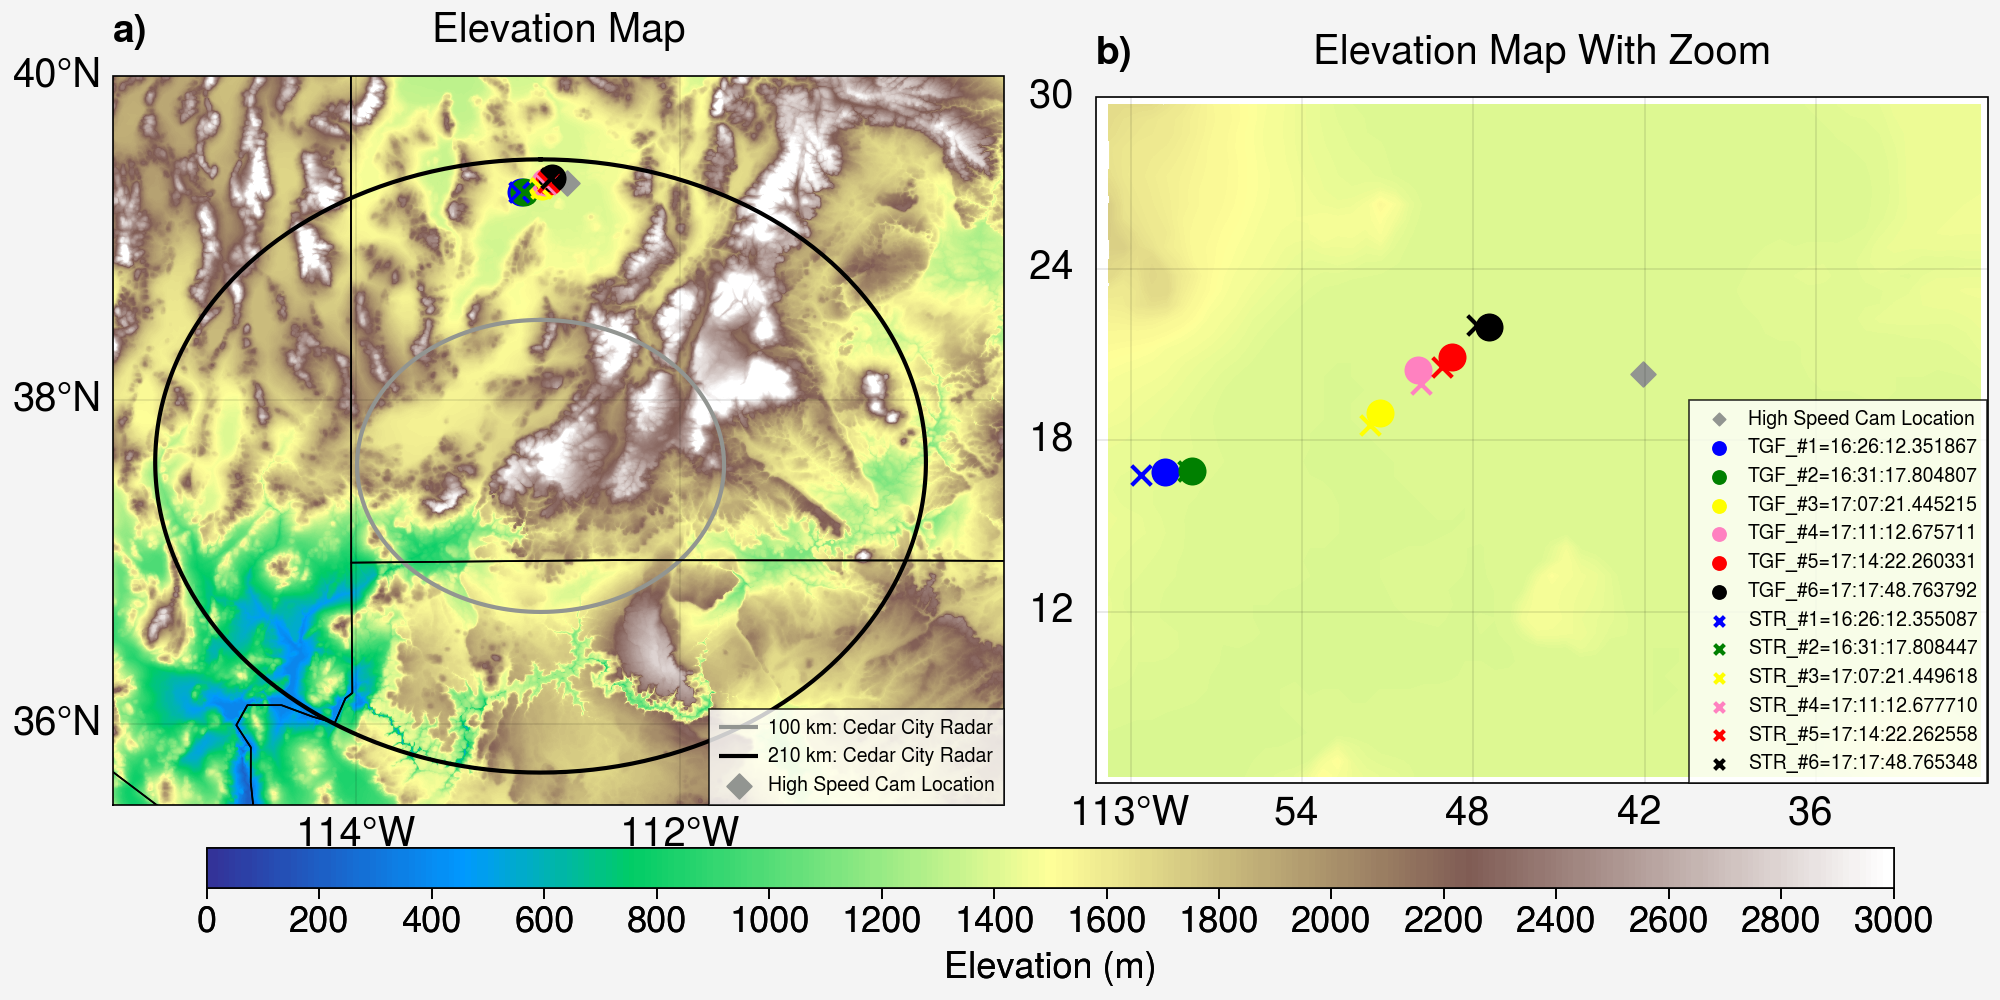

In [200]:
%%time
#========================================================================================================================#
#                                                  DEFINIÇÕES TGF
#========================================================================================================================#
lat_tgf_20210911_1625, lon_tgf_20210911_1625 = [39.281201], [-112.98016]
lat_tgf_20210911_1629, lon_tgf_20210911_1629 = [39.282172], [-112.964349]
lat_tgf_20210911_1706, lon_tgf_20210911_1706 = [39.315896], [-112.854204]
lat_tgf_20210911_1710, lon_tgf_20210911_1710 = [39.340801], [-112.832229]
lat_tgf_20210911_1714, lon_tgf_20210911_1714 = [39.348241], [-112.812355]
lat_tgf_20210911_1719, lon_tgf_20210911_1719 = [39.365816], [-112.790574]

label_tgf_1 = '16:26:12.351867'
label_tgf_2 = '16:31:17.804807'
label_tgf_3 = '17:07:21.445215'
label_tgf_4 = '17:11:12.675711'
label_tgf_5 = '17:14:22.260331'
label_tgf_6 = '17:17:48.763792'

cores = ['blue', 'green', 'yellow', 'pink', 'red', 'black']

#========================================================================================================================#
#                                               DEFINIÇÕES STROKES
#========================================================================================================================#
lat_str_20210911_1625, lon_str_20210911_1625 = [39.2798], [-112.9941]
lat_str_20210911_1629, lon_str_20210911_1629 = [39.2820], [-112.9663]
lat_str_20210911_1706, lon_str_20210911_1706 = [39.3086], [-112.8601]
lat_str_20210911_1710, lon_str_20210911_1710 = [39.3328], [-112.8308]
lat_str_20210911_1714, lon_str_20210911_1714 = [39.3426], [-112.8184]
lat_str_20210911_1719, lon_str_20210911_1719 = [39.3673], [-112.7977]

label_str_1 = '16:26:12.355087'
label_str_2 = '16:31:17.808447'
label_str_3 = '17:07:21.449618'
label_str_4 = '17:11:12.677710'
label_str_5 = '17:14:22.262558'
label_str_6 = '17:17:48.765348'

#========================================================================================================================#
#                                               DEFINIÇÕES RADAR E CÂMERA
#========================================================================================================================#
#lon_radar_salte_lake_norte, lat_radar_salte_lake_norte = -112.447778, 41.262778
lon_radar_cedar_sul, lat_radar_cedar_sul = -112.862183, 37.59105
lat_cam, lon_cam = 39.33844, -112.70092

#========================================================================================================================#
#                                               MAPA DE RELEVO
#========================================================================================================================#
# moldura da figura
fig, ax = pplt.subplots(nrows=1, ncols=2, figsize=(10,5), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(small='20px', large='20px',
          abc=True, abcstyle='a)', abcsize=14)

#========================================================================================================================#
#                                                   FIG-1
#========================================================================================================================#
# formatação dos eixos
ax[0].format(coast=True, borders=True, innerborders=True,
             labels=True, latlines=2, lonlines=2,
             latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
             title='Elevation Map')

# mapa de contornos preenchidos
map1 = ax[0].contourf(ds['lon'],
                      ds['lat'],
                      ds['elev'],
                      cmap='terrain',
                      levels=pplt.arange(0, 3000, 10))

# plota câemera
ax[0].scatter(lon_cam, lat_cam, transform=ccrs.PlateCarree(), marker='D', s=40, color='gray', label=f'High Speed Cam Location')

# plota TFG
ax[0].scatter(lon_tgf_20210911_1625, lat_tgf_20210911_1625, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[0])
ax[0].scatter(lon_tgf_20210911_1629, lat_tgf_20210911_1629, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[1])
ax[0].scatter(lon_tgf_20210911_1706, lat_tgf_20210911_1706, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[2])
ax[0].scatter(lon_tgf_20210911_1710, lat_tgf_20210911_1710, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[3])
ax[0].scatter(lon_tgf_20210911_1714, lat_tgf_20210911_1714, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[4])
ax[0].scatter(lon_tgf_20210911_1719, lat_tgf_20210911_1719, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[5])
        
# plota strokes
ax[0].scatter(lon_str_20210911_1625, lat_str_20210911_1625, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[0])
ax[0].scatter(lon_str_20210911_1629, lat_str_20210911_1629, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[1])
ax[0].scatter(lon_str_20210911_1706, lat_str_20210911_1706, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[2])
ax[0].scatter(lon_str_20210911_1710, lat_str_20210911_1710, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[3])
ax[0].scatter(lon_str_20210911_1714, lat_str_20210911_1714, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[4])
ax[0].scatter(lon_str_20210911_1719, lat_str_20210911_1719, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[5])

# plota aneis do radar
#evm_plota_aneis_em_geral([240], lon_radar_salte_lake_norte, lat_radar_salte_lake_norte, 'yellow', label='240 km: Salte Lake City Radar')
evm_plota_aneis_em_geral_painel([100], lon_radar_cedar_sul, lat_radar_cedar_sul, 'gray', label='100 km: Cedar City Radar', x=0)
evm_plota_aneis_em_geral_painel([210], lon_radar_cedar_sul, lat_radar_cedar_sul, 'black', label='210 km: Cedar City Radar', x=0)

# adiciona legenda
ax[0].legend(loc='lr', ncols=1, frameon=True, prop={'size': 7})

#========================================================================================================================#
#                                                   FIG-2
#========================================================================================================================#
# limtes da área de recorte
latmin_rec, latmax_rec, lonmin_rec, lonmax_rec = 39.1, 39.5, -113.02, -112.5
#latmin_rec, latmax_rec, lonmin_rec, lonmax_rec = 39.1, 39.5, -113.02, -112.65

# formatação dos eixos
ax[1].format(labels=True, latlines=0.1, lonlines=0.1,
             latlim=(latmin_rec, latmax_rec), lonlim=(lonmin_rec, lonmax_rec),
             title='Elevation Map With Zoom')

# recorta o dado
ds_rec = ds.sel(lat=slice(latmin_rec, latmax_rec), lon=slice(lonmin_rec, lonmax_rec))

# mapa de contornos preenchidos
ax[1].contourf(ds_rec['lon'],
               ds_rec['lat'],
               ds_rec['elev'],
               cmap='terrain',
               levels=pplt.arange(0, 3000, 10))

# plota câemera
ax[1].scatter(lon_cam, lat_cam, transform=ccrs.PlateCarree(), marker='D', s=40, color='gray', label=f'High Speed Cam Location')

# plota TFG
ax[1].scatter(lon_tgf_20210911_1625, lat_tgf_20210911_1625, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[0], label=f'TGF_#1={label_tgf_1}')
ax[1].scatter(lon_tgf_20210911_1629, lat_tgf_20210911_1629, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[1], label=f'TGF_#2={label_tgf_2}')
ax[1].scatter(lon_tgf_20210911_1706, lat_tgf_20210911_1706, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[2], label=f'TGF_#3={label_tgf_3}')
ax[1].scatter(lon_tgf_20210911_1710, lat_tgf_20210911_1710, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[3], label=f'TGF_#4={label_tgf_4}')
ax[1].scatter(lon_tgf_20210911_1714, lat_tgf_20210911_1714, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[4], label=f'TGF_#5={label_tgf_5}')
ax[1].scatter(lon_tgf_20210911_1719, lat_tgf_20210911_1719, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[5], label=f'TGF_#6={label_tgf_6}')
        
# plota strokes
ax[1].scatter(lon_str_20210911_1625, lat_str_20210911_1625, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[0], label=f'STR_#1={label_str_1}')
ax[1].scatter(lon_str_20210911_1629, lat_str_20210911_1629, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[1], label=f'STR_#2={label_str_2}')
ax[1].scatter(lon_str_20210911_1706, lat_str_20210911_1706, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[2], label=f'STR_#3={label_str_3}')
ax[1].scatter(lon_str_20210911_1710, lat_str_20210911_1710, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[3], label=f'STR_#4={label_str_4}')
ax[1].scatter(lon_str_20210911_1714, lat_str_20210911_1714, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[4], label=f'STR_#5={label_str_5}')
ax[1].scatter(lon_str_20210911_1719, lat_str_20210911_1719, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[5], label=f'STR_#6={label_str_6}')

# adiciona legenda
ax[1].legend(loc='lr', ncols=1, frameon=True, prop={'size':7.0}, markerscale=0.5)

#========================================================================================================================#
#                                               BARRA DE CORES
#========================================================================================================================#
fig.colorbar(map1, loc='b', label='Elevation (m)', ticks=200, ticklabelsize=13, labelsize=13, space=0.4, length=0.90, width=0.20)

#========================================================================================================================#
#                                               SALVA FIGURA
#========================================================================================================================#
fig.save('Fig0b_UTAH_elevation_map.png', dpi=300)

# Plota figura: **DOIS MAPAS** - Com setas

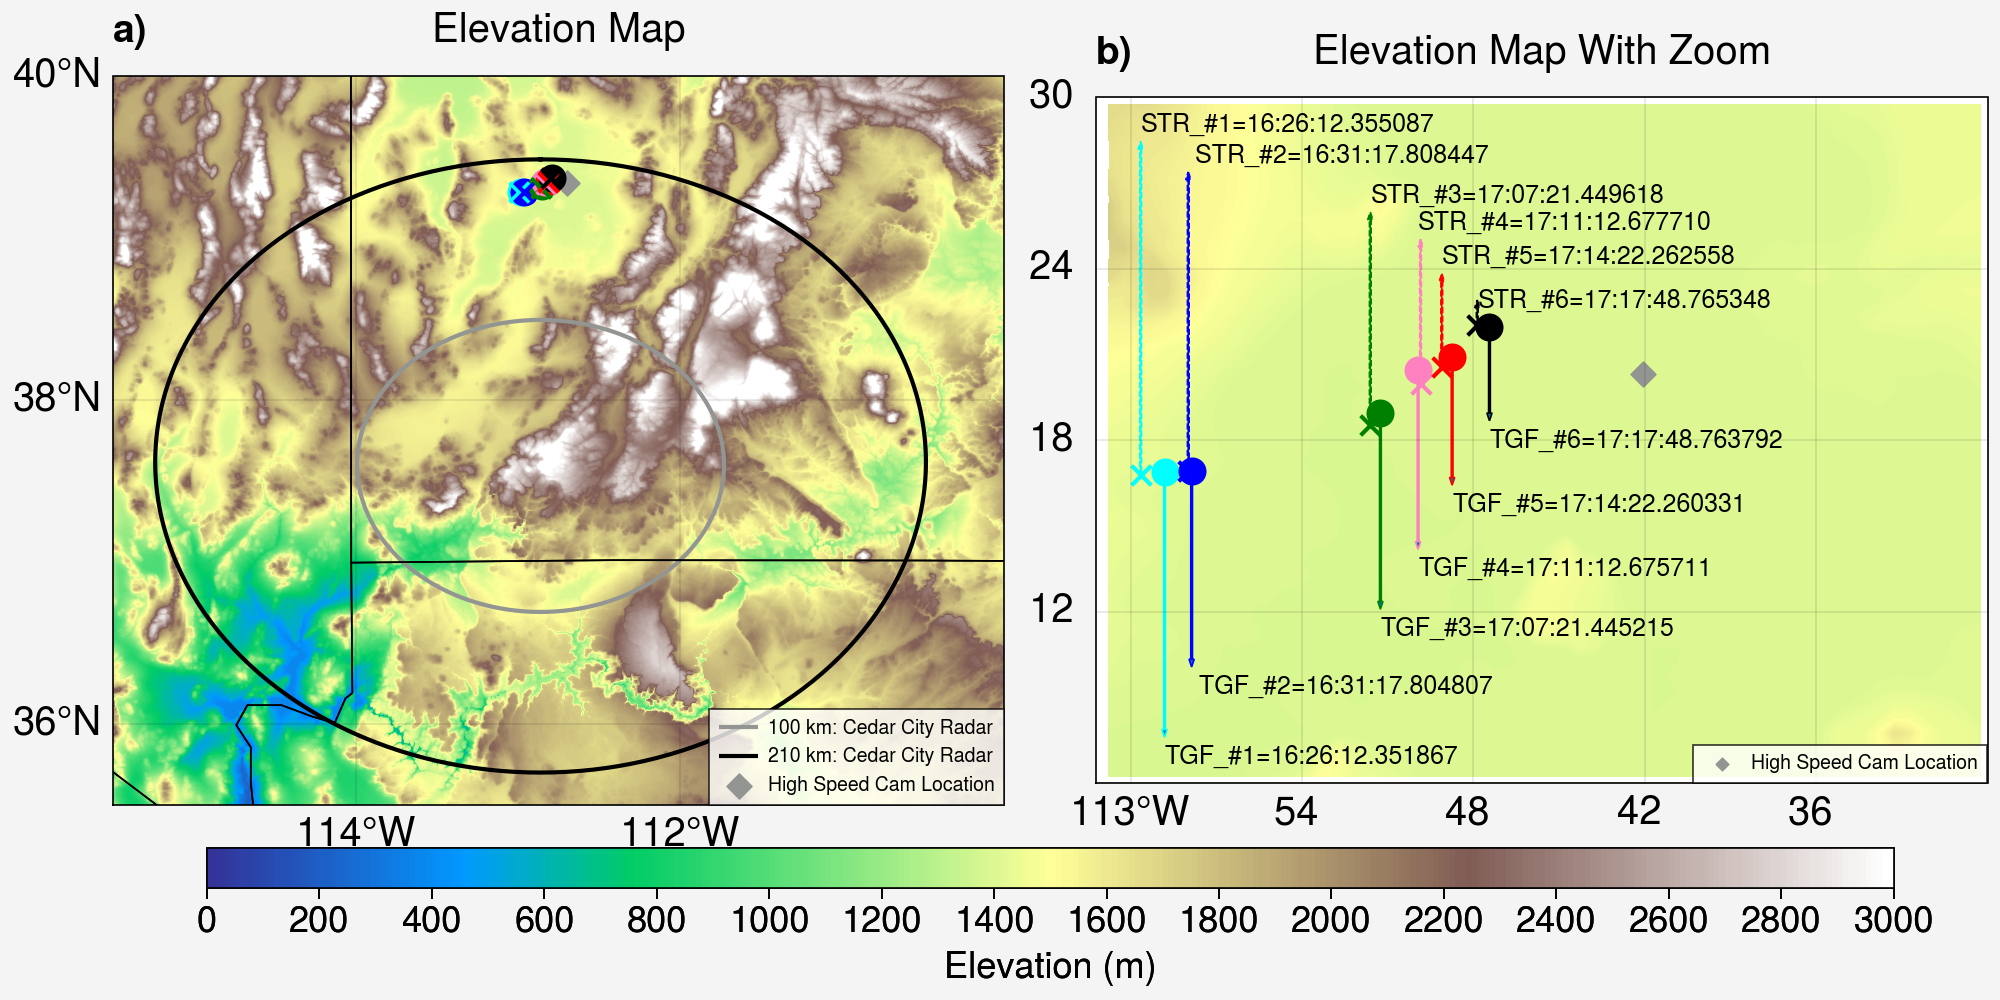

CPU times: total: 35.3 s
Wall time: 1min


In [4]:
%%time
#========================================================================================================================#
#                                                   IMPORTAÇÃO DE BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import proplot as pplt
import cartopy.crs as ccrs
import time
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                                  DEFINIÇÕES TGF
#========================================================================================================================#
lat_tgf_20210911_1625, lon_tgf_20210911_1625 = [39.281201], [-112.98016]
lat_tgf_20210911_1629, lon_tgf_20210911_1629 = [39.282172], [-112.964349]
lat_tgf_20210911_1706, lon_tgf_20210911_1706 = [39.315896], [-112.854204]
lat_tgf_20210911_1710, lon_tgf_20210911_1710 = [39.340801], [-112.832229]
lat_tgf_20210911_1714, lon_tgf_20210911_1714 = [39.348241], [-112.812355]
lat_tgf_20210911_1719, lon_tgf_20210911_1719 = [39.365816], [-112.790574]

label_tgf_1 = '16:26:12.351867'
label_tgf_2 = '16:31:17.804807'
label_tgf_3 = '17:07:21.445215'
label_tgf_4 = '17:11:12.675711'
label_tgf_5 = '17:14:22.260331'
label_tgf_6 = '17:17:48.763792'

cores = ['cyan', 'blue', 'green', 'pink', 'red', 'black']

#========================================================================================================================#
#                                               DEFINIÇÕES STROKES
#========================================================================================================================#
lat_str_20210911_1625, lon_str_20210911_1625 = [39.2798], [-112.9941]
lat_str_20210911_1629, lon_str_20210911_1629 = [39.2820], [-112.9663]
lat_str_20210911_1706, lon_str_20210911_1706 = [39.3086], [-112.8601]
lat_str_20210911_1710, lon_str_20210911_1710 = [39.3328], [-112.8308]
lat_str_20210911_1714, lon_str_20210911_1714 = [39.3426], [-112.8184]
lat_str_20210911_1719, lon_str_20210911_1719 = [39.3673], [-112.7977]

label_str_1 = '16:26:12.355087'
label_str_2 = '16:31:17.808447'
label_str_3 = '17:07:21.449618'
label_str_4 = '17:11:12.677710'
label_str_5 = '17:14:22.262558'
label_str_6 = '17:17:48.765348'

#========================================================================================================================#
#                                               DEFINIÇÕES RADAR E CÂMERA
#========================================================================================================================#
#lon_radar_salte_lake_norte, lat_radar_salte_lake_norte = -112.447778, 41.262778
lon_radar_cedar_sul, lat_radar_cedar_sul = -112.862183, 37.59105
lat_cam, lon_cam = 39.33844, -112.70092

#========================================================================================================================#
#                                               MAPA DE RELEVO
#========================================================================================================================#
# moldura da figura
fig, ax = pplt.subplots(nrows=1, ncols=2, figsize=(10,5), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(small='20px', large='20px',
          abc=True, abcstyle='a)', abcsize=14)

#========================================================================================================================#
#                                                   FIG-1
#========================================================================================================================#
# formatação dos eixos
ax[0].format(coast=True, borders=True, innerborders=True,
             labels=True, latlines=2, lonlines=2,
             latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
             title='Elevation Map')

# mapa de contornos preenchidos
map1 = ax[0].contourf(ds['lon'],
                      ds['lat'],
                      ds['elev'],
                      cmap='terrain',
                      levels=pplt.arange(0, 3000, 10))

# plota câemera
ax[0].scatter(lon_cam, lat_cam, transform=ccrs.PlateCarree(), marker='D', s=40, color='gray', label=f'High Speed Cam Location')

# plota TFG
ax[0].scatter(lon_tgf_20210911_1625, lat_tgf_20210911_1625, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[0])
ax[0].scatter(lon_tgf_20210911_1629, lat_tgf_20210911_1629, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[1])
ax[0].scatter(lon_tgf_20210911_1706, lat_tgf_20210911_1706, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[2])
ax[0].scatter(lon_tgf_20210911_1710, lat_tgf_20210911_1710, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[3])
ax[0].scatter(lon_tgf_20210911_1714, lat_tgf_20210911_1714, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[4])
ax[0].scatter(lon_tgf_20210911_1719, lat_tgf_20210911_1719, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[5])
        
# plota strokes
ax[0].scatter(lon_str_20210911_1625, lat_str_20210911_1625, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[0])
ax[0].scatter(lon_str_20210911_1629, lat_str_20210911_1629, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[1])
ax[0].scatter(lon_str_20210911_1706, lat_str_20210911_1706, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[2])
ax[0].scatter(lon_str_20210911_1710, lat_str_20210911_1710, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[3])
ax[0].scatter(lon_str_20210911_1714, lat_str_20210911_1714, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[4])
ax[0].scatter(lon_str_20210911_1719, lat_str_20210911_1719, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[5])

# plota aneis do radar
#evm_plota_aneis_em_geral([240], lon_radar_salte_lake_norte, lat_radar_salte_lake_norte, 'yellow', label='240 km: Salte Lake City Radar')
evm_plota_aneis_em_geral_painel([100], lon_radar_cedar_sul, lat_radar_cedar_sul, 'gray', label='100 km: Cedar City Radar', x=0)
evm_plota_aneis_em_geral_painel([210], lon_radar_cedar_sul, lat_radar_cedar_sul, 'black', label='210 km: Cedar City Radar', x=0)

# adiciona legenda
ax[0].legend(loc='lr', ncols=1, frameon=True, prop={'size': 7})

#========================================================================================================================#
#                                                   FIG-2
#========================================================================================================================#
# limtes da área de recorte
latmin_rec, latmax_rec, lonmin_rec, lonmax_rec = 39.1, 39.5, -113.02, -112.5
#latmin_rec, latmax_rec, lonmin_rec, lonmax_rec = 39.1, 39.5, -113.02, -112.65

# formatação dos eixos
ax[1].format(labels=True, latlines=0.1, lonlines=0.1,
             latlim=(latmin_rec, latmax_rec), lonlim=(lonmin_rec, lonmax_rec),
             title='Elevation Map With Zoom')

# recorta o dado
ds_rec = ds.sel(lat=slice(latmin_rec, latmax_rec), lon=slice(lonmin_rec, lonmax_rec))

# mapa de contornos preenchidos
ax[1].contourf(ds_rec['lon'],
               ds_rec['lat'],
               ds_rec['elev'],
               cmap='terrain',
               levels=pplt.arange(0, 3000, 10))

# plota câemera
ax[1].scatter(lon_cam, lat_cam, transform=ccrs.PlateCarree(), marker='D', s=40, color='gray', label=f'High Speed Cam Location')

# plota TFG
ax[1].scatter(lon_tgf_20210911_1625, lat_tgf_20210911_1625, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[0])
ax[1].scatter(lon_tgf_20210911_1629, lat_tgf_20210911_1629, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[1])
ax[1].scatter(lon_tgf_20210911_1706, lat_tgf_20210911_1706, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[2])
ax[1].scatter(lon_tgf_20210911_1710, lat_tgf_20210911_1710, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[3])
ax[1].scatter(lon_tgf_20210911_1714, lat_tgf_20210911_1714, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[4])
ax[1].scatter(lon_tgf_20210911_1719, lat_tgf_20210911_1719, transform=ccrs.PlateCarree(), marker='o', s=90, color=cores[5])
        
# plota strokes
ax[1].scatter(lon_str_20210911_1625, lat_str_20210911_1625, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[0])
ax[1].scatter(lon_str_20210911_1629, lat_str_20210911_1629, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[1])
ax[1].scatter(lon_str_20210911_1706, lat_str_20210911_1706, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[2])
ax[1].scatter(lon_str_20210911_1710, lat_str_20210911_1710, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[3])
ax[1].scatter(lon_str_20210911_1714, lat_str_20210911_1714, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[4])
ax[1].scatter(lon_str_20210911_1719, lat_str_20210911_1719, transform=ccrs.PlateCarree(), marker='x', s=50, color=cores[5])

# seta TFG
dx, dy_txt = 0., 0.02
dy1, dy2, dy3, dy4, dy5, dy6 = 0.15, 0.11, 0.11, 0.10, 0.07, 0.05

ax[1].arrow(lon_tgf_20210911_1625[0], lat_tgf_20210911_1625[0], 0., -dy1, width=0.001, edgecolor=cores[0]) 
ax[1].text(lon_tgf_20210911_1625[0], lat_tgf_20210911_1625[0]-dy1-dy_txt, f'TGF_#1={label_tgf_1}')

ax[1].arrow(lon_tgf_20210911_1629[0], lat_tgf_20210911_1629[0], 0., -dy2, width=0.001, edgecolor=cores[1]) 
ax[1].text(lon_tgf_20210911_1629[0], lat_tgf_20210911_1629[0]-dy2-dy_txt, f' TGF_#2={label_tgf_2}')

ax[1].arrow(lon_tgf_20210911_1706[0], lat_tgf_20210911_1706[0], 0., -dy3, width=0.001, edgecolor=cores[2])
ax[1].text(lon_tgf_20210911_1706[0], lat_tgf_20210911_1706[0]-dy3-dy_txt, f'TGF_#3={label_tgf_3}')

ax[1].arrow(lon_tgf_20210911_1710[0], lat_tgf_20210911_1710[0], 0., -dy4, width=0.001, edgecolor=cores[3])
ax[1].text(lon_tgf_20210911_1710[0], lat_tgf_20210911_1710[0]-dy4-dy_txt, f'TGF_#4={label_tgf_4}')

ax[1].arrow(lon_tgf_20210911_1714[0], lat_tgf_20210911_1714[0], 0., -dy5, width=0.001, edgecolor=cores[4])
ax[1].text(lon_tgf_20210911_1714[0], lat_tgf_20210911_1714[0]-dy5-dy_txt, f'TGF_#5={label_tgf_5}')

ax[1].arrow(lon_tgf_20210911_1719[0], lat_tgf_20210911_1719[0], 0., -dy6, width=0.001, edgecolor=cores[5])
ax[1].text(lon_tgf_20210911_1719[0], lat_tgf_20210911_1719[0]-dy6-dy_txt, f'TGF_#6={label_tgf_6}')

# seta STROKE
dx, dy_txt = 0., -0.01
dy1, dy2, dy3, dy4, dy5, dy6 = -0.19, -0.17, -0.12, -0.08, -0.05, -0.010

ax[1].arrow(lon_str_20210911_1625[0], lat_str_20210911_1625[0], 0., -dy1, width=0.001, facecolor=cores[0], edgecolor=cores[0], ls='--') 
ax[1].text(lon_str_20210911_1625[0], lat_str_20210911_1625[0]-dy1-dy_txt, f'STR_#1={label_str_1}')

ax[1].arrow(lon_str_20210911_1629[0], lat_str_20210911_1629[0], 0., -dy2, width=0.001, facecolor=cores[1], edgecolor=cores[1], ls='--') 
ax[1].text(lon_str_20210911_1629[0], lat_str_20210911_1629[0]-dy2-dy_txt, f' STR_#2={label_str_2}')

ax[1].arrow(lon_str_20210911_1706[0], lat_str_20210911_1706[0], 0., -dy3, width=0.001, facecolor=cores[2], edgecolor=cores[2], ls='--')
ax[1].text(lon_str_20210911_1706[0], lat_str_20210911_1706[0]-dy3-dy_txt, f'STR_#3={label_str_3}')

ax[1].arrow(lon_str_20210911_1710[0], lat_str_20210911_1710[0], 0., -dy4, width=0.001, facecolor=cores[3], edgecolor=cores[3], ls='--')
ax[1].text(lon_tgf_20210911_1710[0], lat_str_20210911_1710[0]-dy4-dy_txt, f'STR_#4={label_str_4}')

ax[1].arrow(lon_str_20210911_1714[0], lat_str_20210911_1714[0], 0., -dy5, width=0.001, facecolor=cores[4], edgecolor=cores[4], ls='--')
ax[1].text(lon_str_20210911_1714[0], lat_str_20210911_1714[0]-dy5-dy_txt, f'STR_#5={label_str_5}')

ax[1].arrow(lon_str_20210911_1719[0], lat_str_20210911_1719[0], 0., -dy6, width=0.001, facecolor=cores[5], edgecolor=cores[5], ls='--')
ax[1].text(lon_str_20210911_1719[0], lat_str_20210911_1719[0]-dy6-dy_txt-0.01, f'STR_#6={label_str_6}')

# adiciona legenda
ax[1].legend(loc='lr', ncols=1, frameon=True, prop={'size':7.0}, markerscale=0.5)

#========================================================================================================================#
#                                               BARRA DE CORES
#========================================================================================================================#
fig.colorbar(map1, loc='b', label='Elevation (m)', ticks=200, ticklabelsize=13, labelsize=13, space=0.4, length=0.90, width=0.20)

#========================================================================================================================#
#                                               SALVA FIGURA
#========================================================================================================================#
fig.save('Fig0c_UTAH_elevation_map.png', dpi=300)
pplt.show()